In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing as sklpp
import numpy as np

In [12]:
net = MLPRegressor(hidden_layer_sizes=(512,512,), verbose=True)

In [13]:
high_dim_data = np.load('exported-data/tsne_input_training.npy')

In [14]:
low_dim_data = np.load('exported-data/tsne_projected_training.npy')

In [15]:
rng_state = np.random.get_state()
np.random.shuffle(high_dim_data)
np.random.set_state(rng_state)
np.random.shuffle(low_dim_data)

In [16]:
scaler = sklpp.StandardScaler().fit(high_dim_data)

In [17]:
num_train = 15000
net.fit(scaler.transform(high_dim_data[:num_train]), low_dim_data[:num_train])

Iteration 1, loss = 0.92056684
Iteration 2, loss = 0.33072039
Iteration 3, loss = 0.25051371
Iteration 4, loss = 0.20528038
Iteration 5, loss = 0.17730238
Iteration 6, loss = 0.16147920
Iteration 7, loss = 0.14859377
Iteration 8, loss = 0.13415821
Iteration 9, loss = 0.12672185
Iteration 10, loss = 0.12309979
Iteration 11, loss = 0.11528141
Iteration 12, loss = 0.11071034
Iteration 13, loss = 0.10671206
Iteration 14, loss = 0.09857901
Iteration 15, loss = 0.09859009
Iteration 16, loss = 0.09357435
Iteration 17, loss = 0.08892184
Iteration 18, loss = 0.08656797
Iteration 19, loss = 0.08524788
Iteration 20, loss = 0.08346003
Iteration 21, loss = 0.07810408
Iteration 22, loss = 0.07468672
Iteration 23, loss = 0.07516845
Iteration 24, loss = 0.07292795
Iteration 25, loss = 0.06905335
Iteration 26, loss = 0.07043146
Iteration 27, loss = 0.06710753
Iteration 28, loss = 0.06514559
Iteration 29, loss = 0.06437551
Iteration 30, loss = 0.06768999
Iteration 31, loss = 0.06119791
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(512, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [19]:
import matplotlib.pyplot as plt

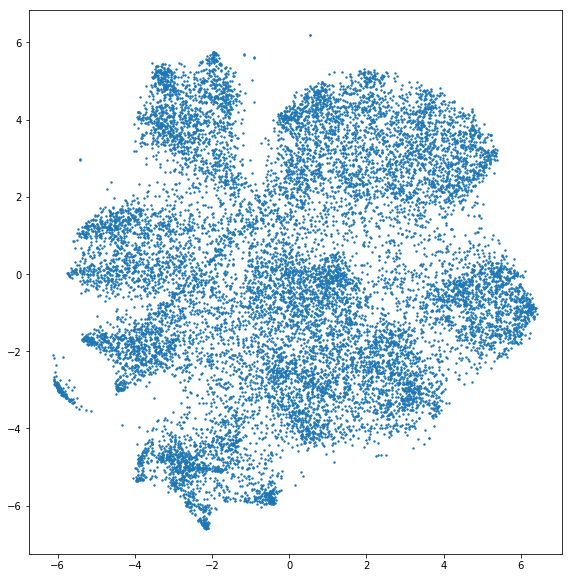

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(low_dim_data[:15000,0],low_dim_data[:15000,1],s=2)
ax.set_aspect('equal')
plt.show()

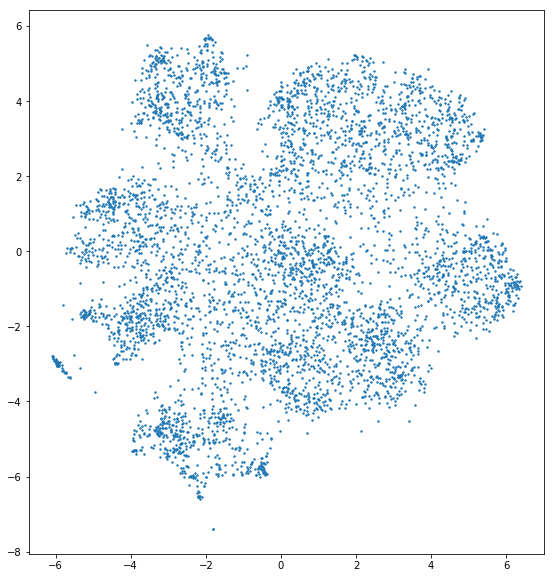

In [21]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(low_dim_data[15000:,0],low_dim_data[15000:,1],s=2)
ax.set_aspect('equal')
plt.show()

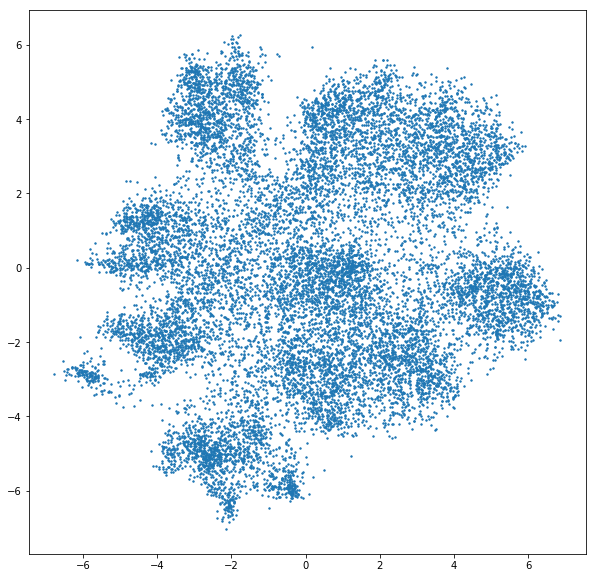

In [22]:
foo = net.predict(scaler.transform(high_dim_data[:15000]))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(foo[:,0],foo[:,1],s=2)
ax.set_aspect('equal')
plt.show()

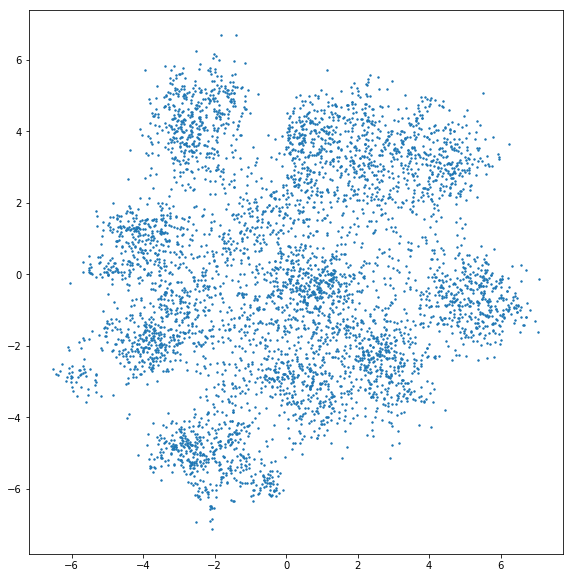

In [23]:
foo = net.predict(scaler.transform(high_dim_data[15000:]))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(foo[:,0],foo[:,1],s=2)
ax.set_aspect('equal')
plt.show()

In [4]:
epoch_data = np.load('exported-data/training_outputs_epoch_NEW.npy')

In [1]:
import torch

In [5]:
foo = torch.tensor(epoch_data)

In [6]:
foo.shape

torch.Size([10000, 16, 20, 10])

In [11]:
bar = foo.transpose(0,1).flatten(start_dim=1,end_dim=2)

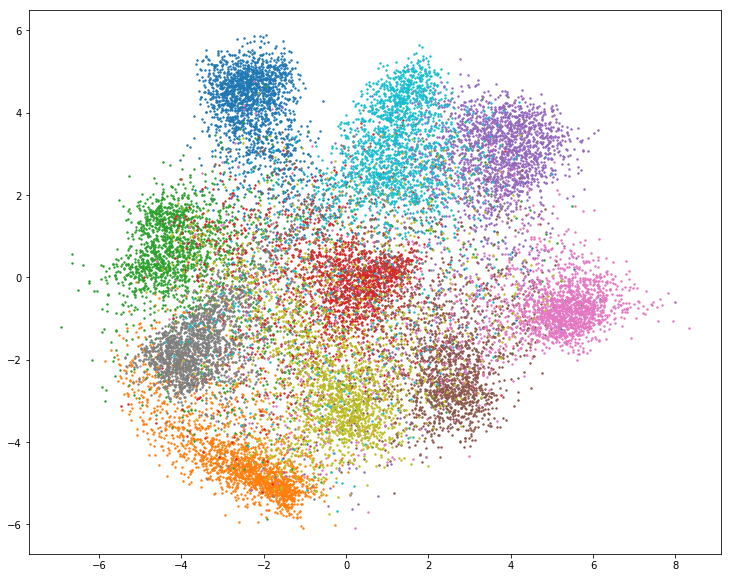

In [24]:
foo = net.predict(scaler.transform(bar[0,::10]))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
length = len(foo)//10
for i in range(10):
    ax.scatter(
        foo[i*length:(i+1)*length, 0],
        foo[i*length:(i+1)*length, 1],
        s=2
    )
ax.set_aspect('equal')
plt.show()